In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
path=os.getcwd()
Path=os.path.basename(path)
print(path)
print(Path)

C:\Users\sjeev\Documents\Python\Jupyter_nbook\Intern\Sentimental Analysis\Sentiment.csv
Sentiment.csv


In [7]:
df=pd.read_csv(Path)

In [8]:
data=df[["text","sentiment"]]

In [9]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [10]:
train, test= train_test_split(data,test_size=0.1)

In [11]:
train=train[train.sentiment!="Neutral"]

In [12]:
train.sentiment.value_counts()

sentiment
Negative    7649
Positive    2021
Name: count, dtype: int64

In [13]:
train_pos=train[train.sentiment =="Positive"]
train_pos=train_pos["text"]
train_neg=train[train.sentiment=="Negative"]
train_neg=train_neg["text"]

Positive words


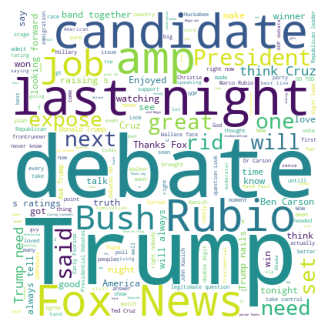

Negative words


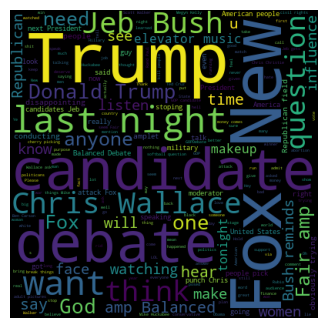

In [14]:
def wordcloud_draw(data,color="black"):
    words_filtered=" ".join(data)
    cleared_words=" ".join([word for word in words_filtered.split()
                            if "http" not in word
                           and not word.startswith("@")
                           and not word.startswith("#")
                           and word!="RT"])
    Wordcloud=WordCloud(stopwords=STOPWORDS,
                       height=400,
                       width=400,
                       background_color=color).generate(cleared_words)
    plt.figure(1,figsize=(4,4))
    plt.imshow(Wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [15]:
tweets=[]
Stopwords=set(stopwords.words("english"))

for index,row in train.iterrows():
    words_filtered=[e.lower() for e in row.text.split() if len(e)>=3]
    words_cleared=[word for word in words_filtered
                  if "http" not in word
                  and not word.startswith("@")
                  and not word.startswith("#")
                  and word != "RT"]
    words_without_stopword=[word for word in words_cleared if not word in Stopwords]
    tweets.append((words_without_stopword,row.sentiment))

In [16]:
test_pos=test[test.sentiment=="Positive"]
test_pos=test_pos.text
test_neg=test[test.sentiment=="Negative"]
test_neg=test_neg.text

In [17]:
print(tweets)

[(['evidence', 'hacks', 'talk', 'comes', 'syria'], 'Negative'), (['chris', 'wallace', 'ask', 'politicans', 'finances', 'money', 'comes', 'from?'], 'Negative'), (['watching', 'seems', 'like', 'bashing', 'pbo', '"failed', 'policies"', 'impo…'], 'Negative'), (['candidates', 'eating', 'other.', 'tea', 'baggers', 'hate', 'fox', 'host.', 'donald', 'scores', 'twice', 'hillary.', 'lmao'], 'Negative'), (['good', 'job', 'fox', 'news'], 'Positive'), (['cheers', 'audience', 'aftertrump', 'defiantly', 'named', 'woman', 'called', '"fat', 'pig"', 'voices'], 'Negative'), (['fox', 'news', 'obviously', 'trying', 'influence', 'makeup', 'republican', 'field.'], 'Negative'), (['really', 'good', 'career', 'prospect', 'open', 'mic', 'comedian'], 'Negative'), (['first', 'question', '3rd', 'party', 'run', 'give', 'disadvantage', 'start.'], 'Negative'), (['pres', 'obama', 'brains', 'little', 'toe', 'totally', 'fucking', 'idiots', 'whole', 'families', 'combined'], 'Negative'), (['.@skye820', "we're", 'going', 'm

In [22]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

<FreqDist with 14551 samples and 76290 outcomes>


In [26]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)


In [27]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 844/807 
[Positive]: 215/90 
